In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


In [6]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [7]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


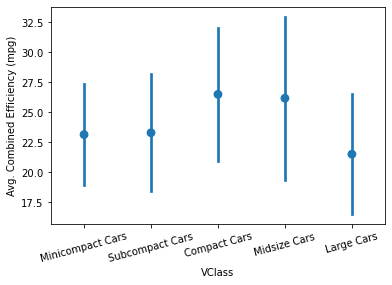

In [8]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="");
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

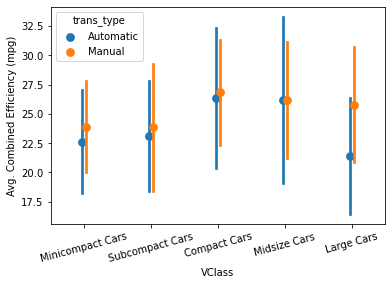

In [10]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type', 
             linestyles="", dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

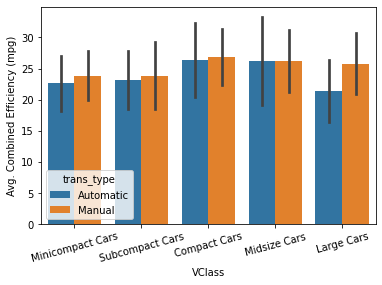

In [13]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

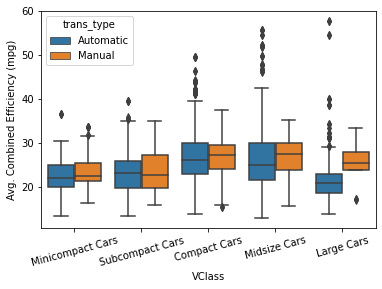

In [15]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

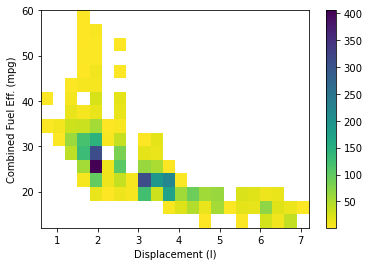

In [41]:
# for heat map to add a third parameter
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
           cmap='viridis_r', bins = [bins_x, bins_y]);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

In [31]:
displ_bins = pd.cut(fuel_econ.displ, bins_x, right = False, include_lowest=False,
                   labels = False).astype(int)
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int32

In [58]:
comb_bins = pd.cut(fuel_econ.comb,  bins_y, right = False, include_lowest=False,
                  labels = False).astype(int)
comb_bins

0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926    10
3927     3
3928     3
Name: comb, Length: 3929, dtype: int32

In [33]:
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points 

displ  comb
0      7        3
       9        3
1      6        4
       7        8
2      5       42
               ..
19     1       20
       2       15
20     0       38
       1       13
21     1        2
Length: 91, dtype: int64

In [34]:
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [35]:
co2_weight = fuel_econ.co2 / n_points[displ_bins, comb_bins]
co2_weight

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

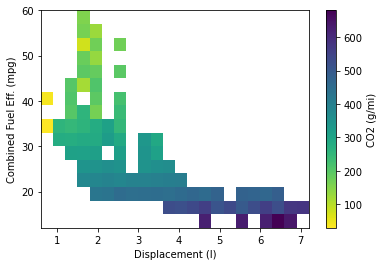

In [36]:
# for heat map to add a third parameter
# add weight 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
           cmap='viridis_r', bins = [bins_x, bins_y], weights=co2_weight);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');

# NOT SURE WHAT THE ABOVE CALULATION MEAN

## https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [57]:
######## pandas.cut practice ############
bin1 = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)
bin1

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [49]:
type(bin1)

pandas.core.arrays.categorical.Categorical

In [50]:
bin2 = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)
bin2

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [51]:
type(bin2)

tuple

In [52]:
bin3 = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"])
bin3

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [53]:
type(bin3)

pandas.core.arrays.categorical.Categorical

In [56]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

In [55]:
pd.cut([0, 1, 1, 2], bins=4, labels=False)

array([0, 1, 1, 3], dtype=int64)